In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def add_cols(df):
    df["info"] = df["info"].apply(eval)
    for key in df["info"][0].keys():
        df[key] = df["info"].apply(lambda x: x[key])
    df.drop(columns=["info"], inplace=True)
    return df

In [3]:
df = pd.read_csv('results.csv', sep=";")
df = add_cols(df)
df.head()

,model,n_params,loss,acc,path,Spectrogram,Regularization,Optimizer,Learning Rate,Batch Size,d_model,num_layers,num_heads,dropout_rate
0,Transformer,2425118,0.414574,0.881053,Transformer1.weights.h5,Normal,Dropout,Adam,0.001,256,256,2,2,0.2
1,Transformer,4530462,0.337038,0.915435,Transformer2.weights.h5,Normal,Dropout,Adam,0.001,256,256,4,2,0.2
2,Transformer,6633758,0.390747,0.912363,Transformer3.weights.h5,Normal,Dropout,Adam,0.0001,128,256,4,4,0.2
3,Transformer,26243614,0.358854,0.917045,Transformer4.weights.h5,Normal,Dropout,Adam,0.0001,128,512,4,4,0.2
4,Transformer,2425118,0.393832,0.892465,Transformer5.weights.h5,Log-Mel,Dropout,Adam,0.001,256,256,2,2,0.2


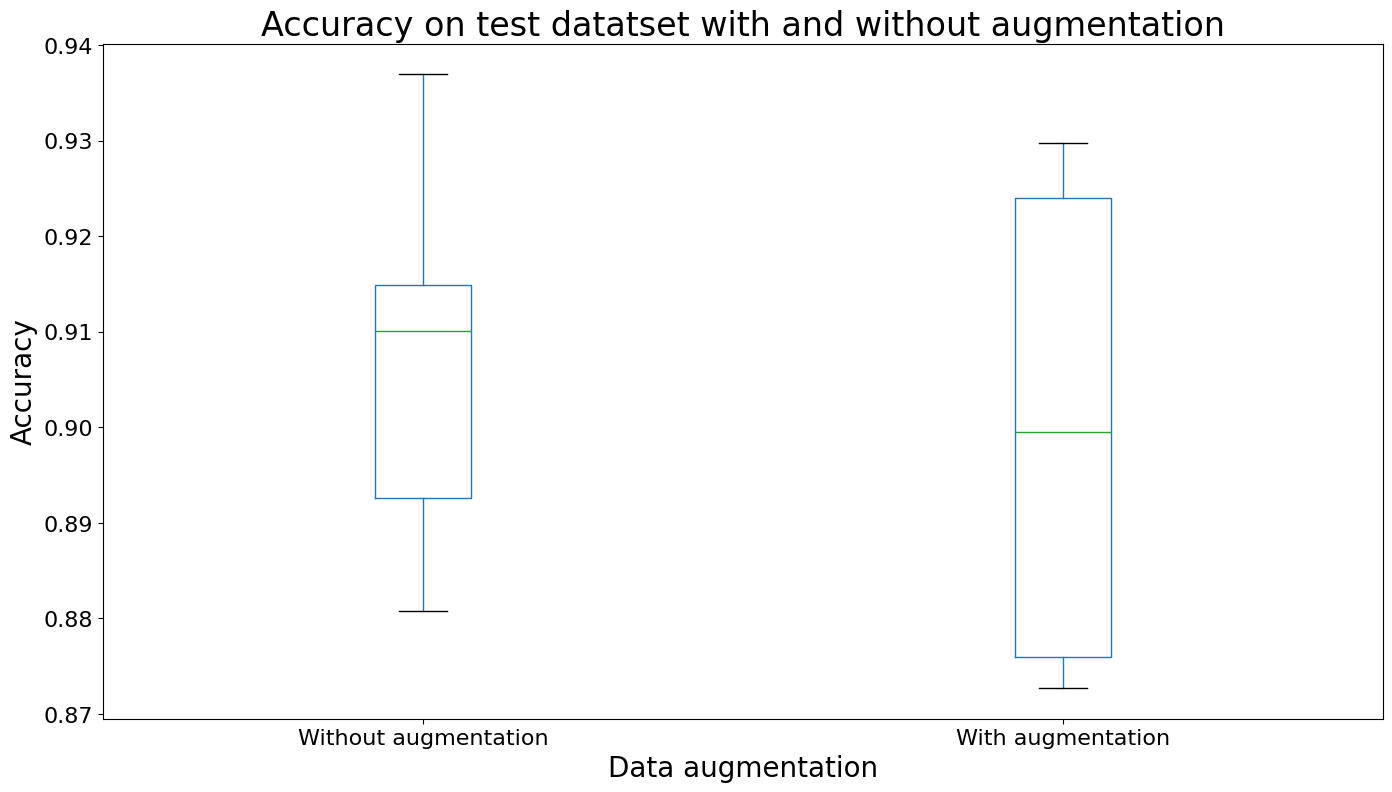

In [4]:
df.boxplot(column='acc', by=['model'], figsize=(16, 9))
plt.title('Accuracy on test datatset with and without augmentation', fontsize=24)
plt.suptitle('')
plt.xlabel('Data augmentation', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
# change xticks text
plt.xticks([1, 2], ['Without augmentation', 'With augmentation'], fontsize=16)
plt.yticks(fontsize=16)
plt.grid(False)
plt.show()

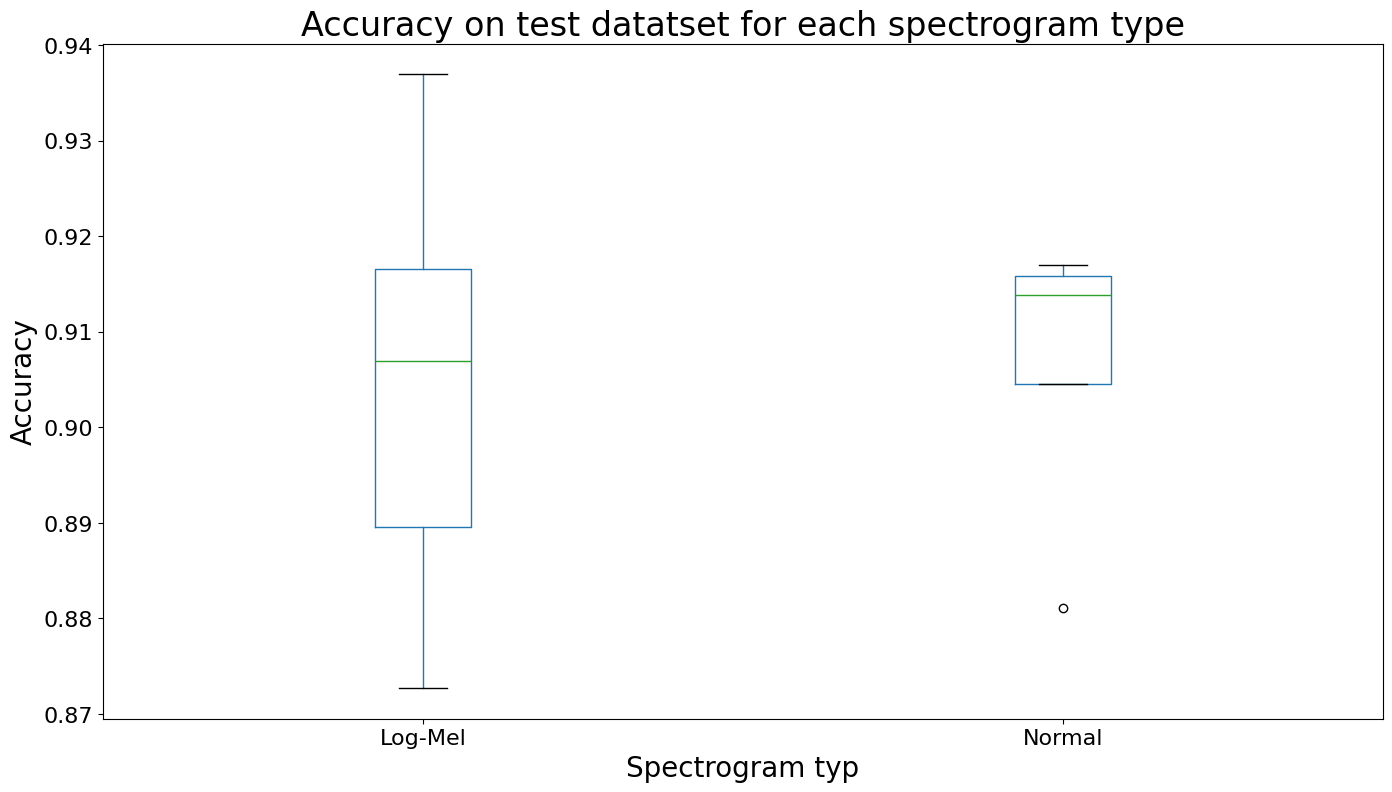

In [5]:
df.boxplot(column='acc', by=['Spectrogram'], figsize=(16, 9))
plt.title('Accuracy on test datatset for each spectrogram type', fontsize=24)
plt.suptitle('')
plt.xlabel('Spectrogram typ', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks([1, 2], ['Log-Mel', 'Normal'], fontsize=16)
plt.yticks(fontsize=16)
plt.grid(False)
plt.show()

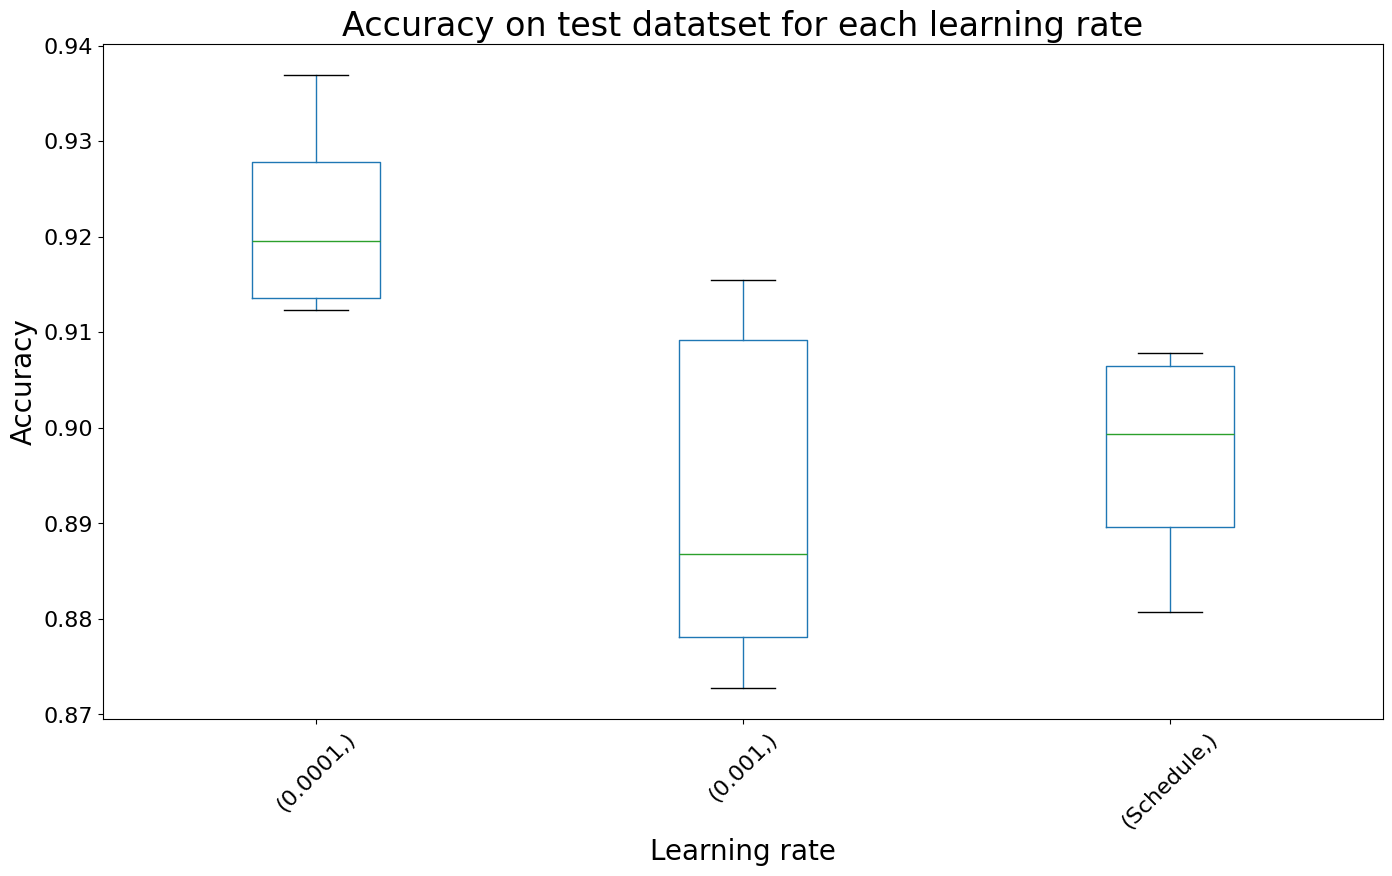

In [6]:
df.boxplot(column='acc', by=['Learning Rate'], figsize=(16, 9))
plt.title('Accuracy on test datatset for each learning rate', fontsize=24)
plt.suptitle('')
plt.xlabel('Learning rate', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.grid(False)
plt.show()

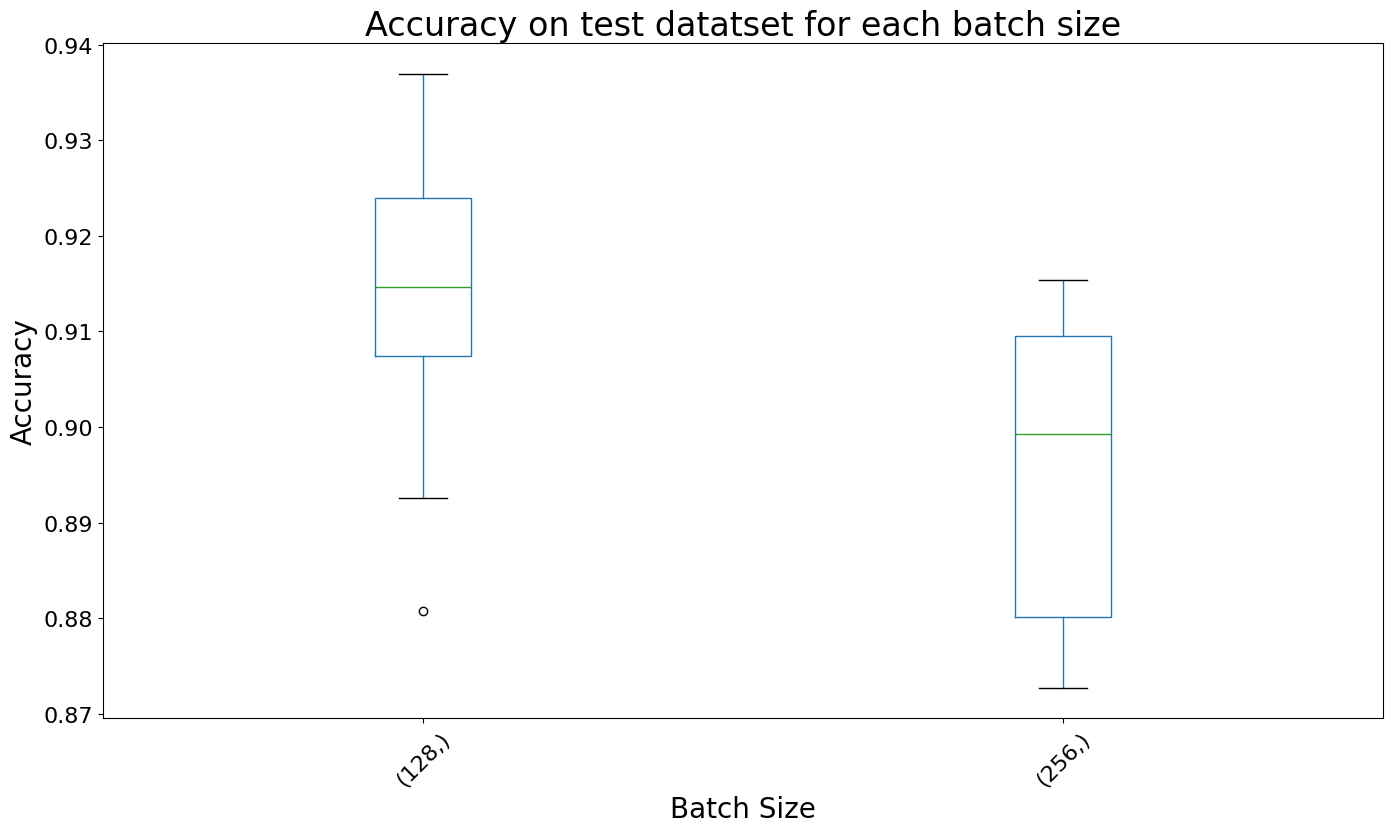

In [7]:
df.boxplot(column='acc', by=['Batch Size'], figsize=(16, 9))
plt.title('Accuracy on test datatset for each batch size', fontsize=24)
plt.suptitle('')
plt.xlabel('Batch Size', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.grid(False)
plt.show()

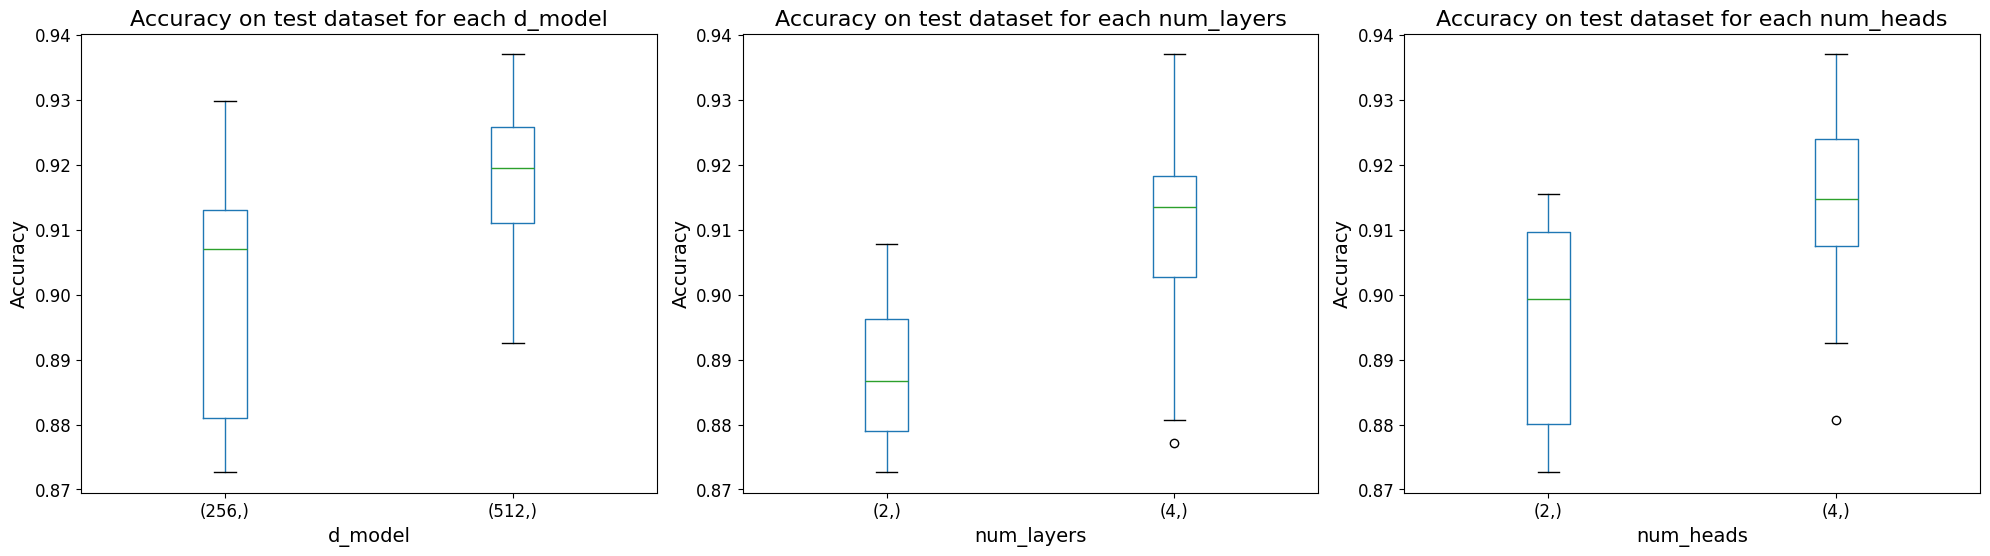

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot for d_model
df.boxplot(column='acc', by=['d_model'], ax=axes[0])
axes[0].set_title('Accuracy on test dataset for each d_model', fontsize=16)
axes[0].set_xlabel('d_model', fontsize=14)
axes[0].set_ylabel('Accuracy', fontsize=14)
axes[0].tick_params(axis='x')
axes[0].tick_params(axis='both', labelsize=12)
axes[0].grid(False)

# Plot for num_layers
df.boxplot(column='acc', by=['num_layers'], ax=axes[1])
axes[1].set_title('Accuracy on test dataset for each num_layers', fontsize=16)
axes[1].set_xlabel('num_layers', fontsize=14)
axes[1].set_ylabel('Accuracy', fontsize=14)
axes[1].tick_params(axis='x')
axes[1].tick_params(axis='both', labelsize=12)
axes[1].grid(False)

# Plot for num_heads
df.boxplot(column='acc', by=['num_heads'], ax=axes[2])
axes[2].set_title('Accuracy on test dataset for each num_heads', fontsize=16)
axes[2].set_xlabel('num_heads', fontsize=14)
axes[2].set_ylabel('Accuracy', fontsize=14)
axes[2].tick_params(axis='x')
axes[2].tick_params(axis='both', labelsize=12)
axes[2].grid(False)

plt.tight_layout()
plt.suptitle('')
plt.show()


In [9]:
df = pd.read_csv('results.csv', sep=";")
df = add_cols(df)
df.head()

,model,n_params,loss,acc,path,Spectrogram,Regularization,Optimizer,Learning Rate,Batch Size,d_model,num_layers,num_heads,dropout_rate
0,Transformer,2425118,0.414574,0.881053,Transformer1.weights.h5,Normal,Dropout,Adam,0.001,256,256,2,2,0.2
1,Transformer,4530462,0.337038,0.915435,Transformer2.weights.h5,Normal,Dropout,Adam,0.001,256,256,4,2,0.2
2,Transformer,6633758,0.390747,0.912363,Transformer3.weights.h5,Normal,Dropout,Adam,0.0001,128,256,4,4,0.2
3,Transformer,26243614,0.358854,0.917045,Transformer4.weights.h5,Normal,Dropout,Adam,0.0001,128,512,4,4,0.2
4,Transformer,2425118,0.393832,0.892465,Transformer5.weights.h5,Log-Mel,Dropout,Adam,0.001,256,256,2,2,0.2


In [10]:
df["model"] = df["model"].map({"Transformer_aug": "Transformer", "Transformer": "Transformer"})
# add row to df
df = df._append({"model": "CNN", "n_params": 1628446,"acc": 0.857}, ignore_index=True)
df = df._append({"model": "Whisper", "n_params": 30000000, "acc": 0.945}, ignore_index=True)
df = df.sort_values(by="model")
df

,model,n_params,loss,acc,path,Spectrogram,Regularization,Optimizer,Learning Rate,Batch Size,d_model,num_layers,num_heads,dropout_rate
16,CNN,1628446,NaN,0.857000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Transformer,2425118,0.414574,0.881053,Transformer1.weights.h5,Normal,Dropout,Adam,0.001,256.0,256.0,2.0,2.0,0.2
15,Transformer,26243614,0.362682,0.922019,Transformer_aug4.weights.h5,Log-Mel,Dropout,Adam,0.0001,128.0,512.0,4.0,4.0,0.2
14,Transformer,6633758,0.329044,0.929773,Transformer_aug3.weights.h5,Log-Mel,Dropout,Adam,0.0001,128.0,256.0,4.0,4.0,0.2
13,Transformer,2425118,0.429907,0.877103,Transformer_aug2.weights.h5,Log-Mel,Dropout,Adam,0.001,256.0,256.0,4.0,2.0,0.2
12,Transformer,2425118,0.456650,0.872714,Transformer_aug1.weights.h5,Log-Mel,Dropout,Adam,0.001,256.0,256.0,2.0,2.0,0.2
11,Transformer,26243614,0.390798,0.892612,Transformer12.weights.h5,Log-Mel,Dropout,Adam,Schedule,128.0,512.0,4.0,4.0,0.2
10,Transformer,6633758,0.413505,0.880761,Transformer11.weights.h5,Log-Mel,Dropout,Adam,Schedule,128.0,256.0,4.0,4.0,0.2
9,Transformer,4530462,0.326292,0.906072,Transformer10.weights.h5,Log-Mel,Dropout,Adam,Schedule,256.0,256.0,4.0,2.0,0.2
8,Transformer,2425118,0.338394,0.907827,Transformer9.weights.h5,Log-Mel,Dropout,Adam,Schedule,256.0,256.0,2.0,2.0,0.2


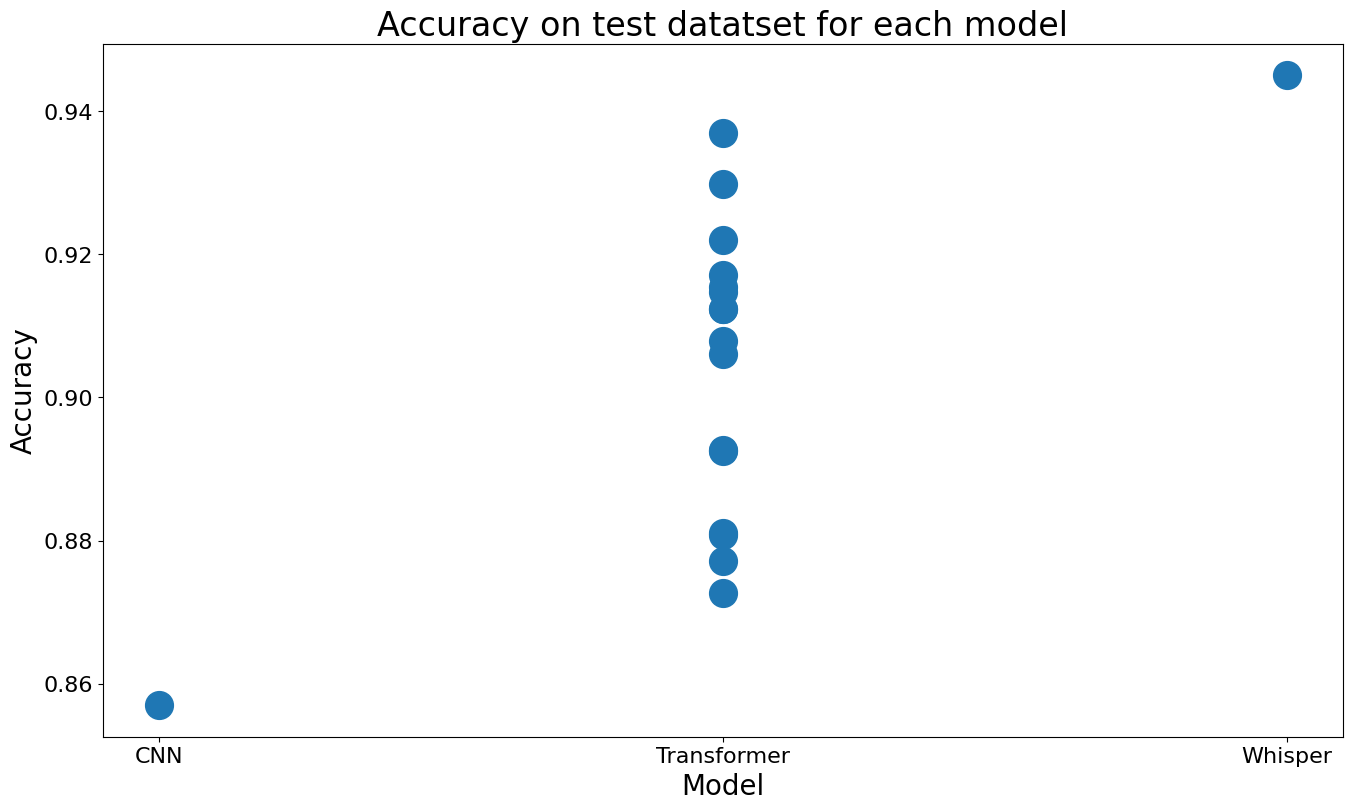

In [11]:
plt.figure(figsize=(16, 9))
plt.scatter(df["model"], df["acc"], s=400)
plt.title('Accuracy on test datatset for each model', fontsize=24)
plt.xlabel('Model', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(False)
plt.show()

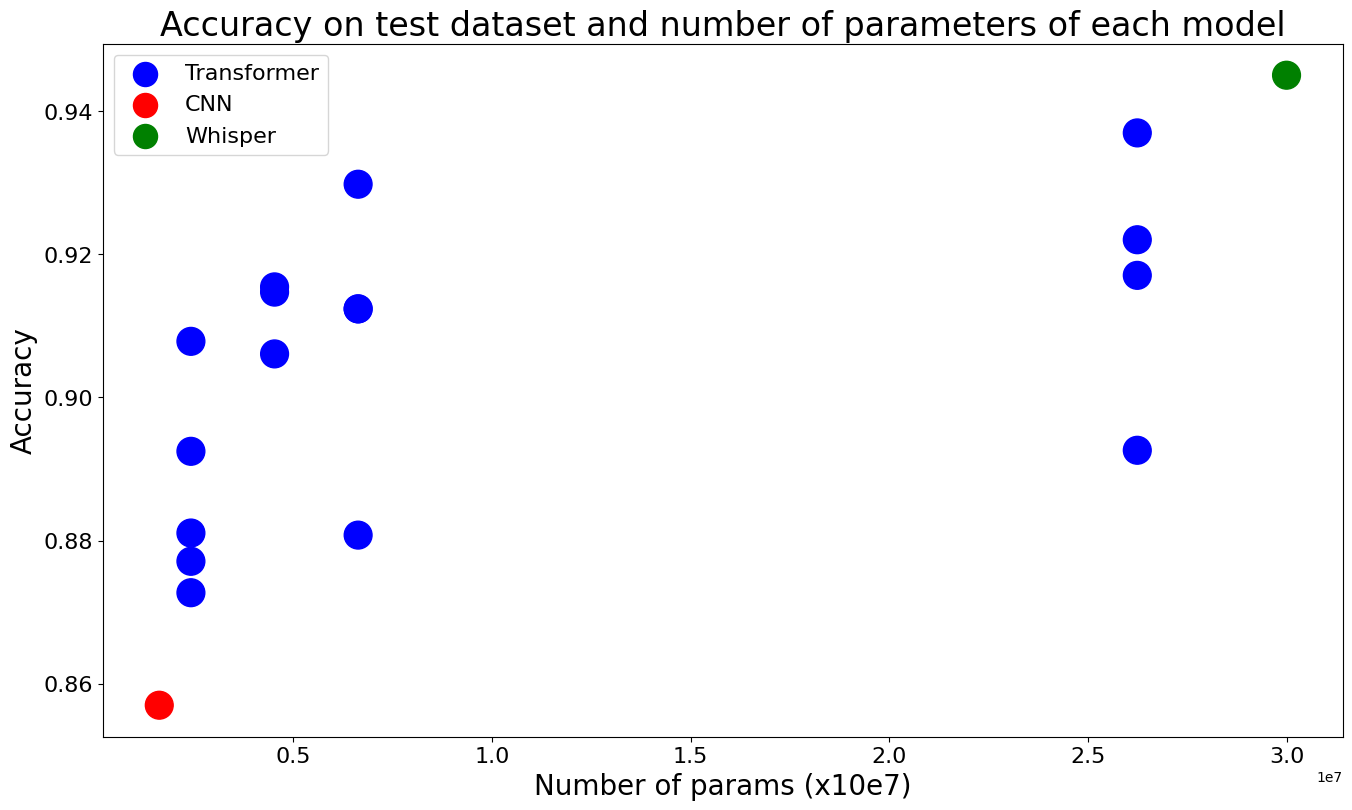

In [16]:
plt.figure(figsize=(16, 9))
plt.scatter(df["n_params"], df["acc"], c=df["model"].map({"Transformer": "blue", "CNN": "red", "Whisper": "green"}), s=400)

plt.scatter([], [], color='blue', label='Transformer', s=300)
plt.scatter([], [], color='red', label='CNN', s=300)
plt.scatter([], [], color='green', label='Whisper', s=300)

plt.title('Accuracy on test dataset and number of parameters of each model', fontsize=24)
plt.xlabel('Number of params (x10e7)', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# increase legend size
plt.legend(fontsize=16)
plt.show()